## imports

In [101]:
import cv2
import numpy as np
import scipy.ndimage
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import filters

## lendo imagem

In [120]:
IMAGE_NAME = "e85d7562-30e0-4df2-819d-8f964192639b_progress_image_54.webp"

In [121]:
# Opening the image using cv2.
image = cv2.imread(IMAGE_NAME)

## Escala cinza e gaussian blur

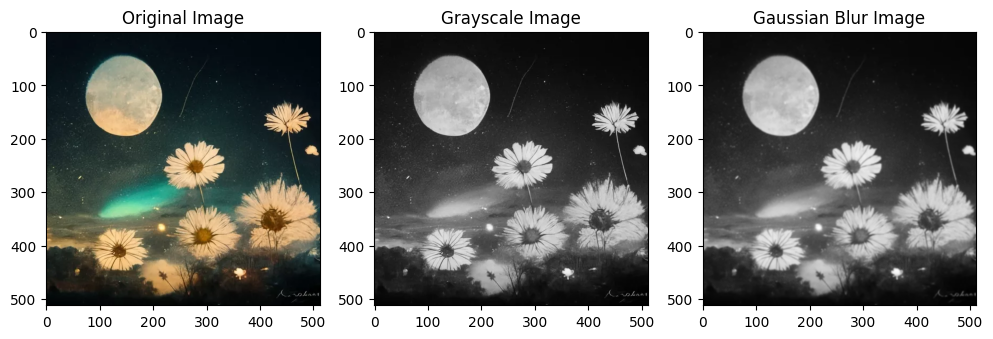

In [122]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 3, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blur Image')

plt.show()

## binarização

In [123]:
ret, thresh1 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

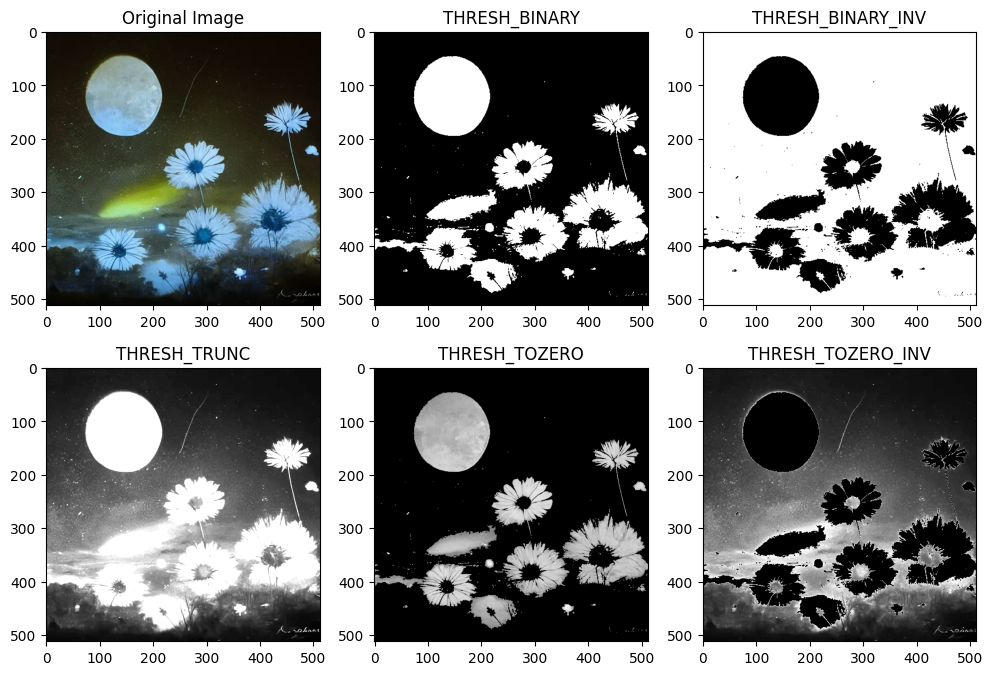

In [124]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(thresh1, cmap='gray')
plt.title('THRESH_BINARY')

plt.subplot(2, 3, 3)
plt.imshow(thresh2, cmap='gray')
plt.title('THRESH_BINARY_INV')

plt.subplot(2, 3, 4)
plt.imshow(thresh3, cmap='gray')
plt.title('THRESH_TRUNC')

plt.subplot(2, 3, 5)
plt.imshow(thresh4, cmap='gray')
plt.title('THRESH_TOZERO')

plt.subplot(2, 3, 6)
plt.imshow(thresh5, cmap='gray')
plt.title('THRESH_TOZERO_INV')

plt.show()

In [125]:
ret, th1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

th3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

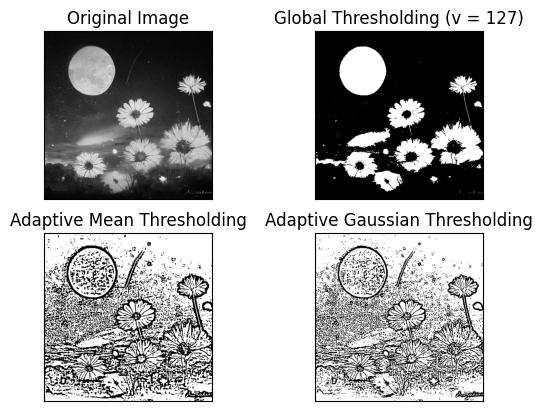

In [126]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray_image, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

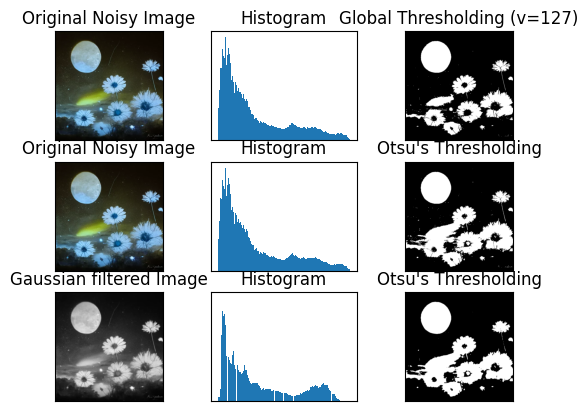

In [127]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Global thresholding
ret1, th1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [image, 0, th1,
          image, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Filtros

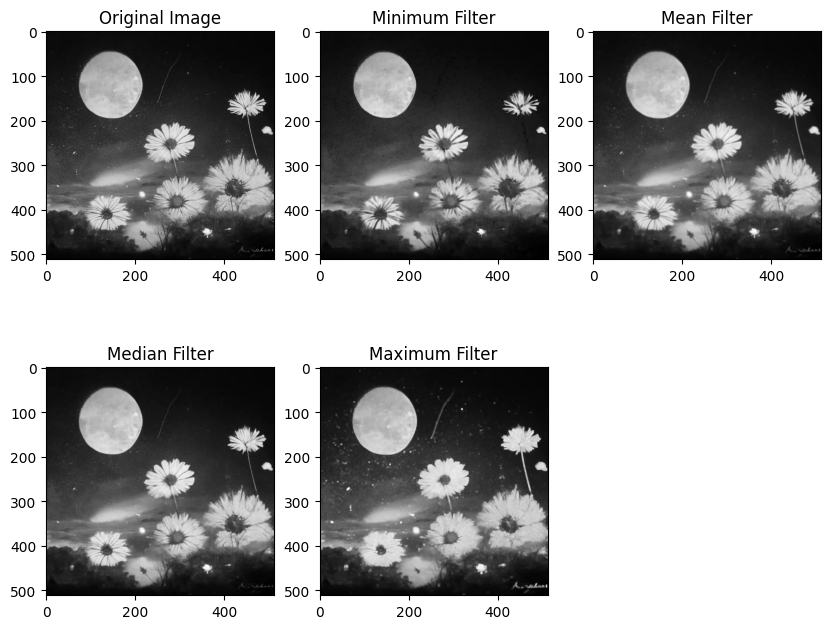

In [128]:
image = cv2.imread(IMAGE_NAME, cv2.IMREAD_GRAYSCALE)

# Minimum filter
min_filtered = cv2.erode(image, kernel=np.ones((3, 3), np.uint8), iterations=1)

# Mean filter
mean_filtered = cv2.blur(image, (3, 3))

# Median filter
median_filtered = cv2.medianBlur(image, 3)

# Maximum filter
max_filtered = cv2.dilate(image, kernel=np.ones((3, 3), np.uint8), iterations=1)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(min_filtered, cmap='gray'), plt.title('Minimum Filter')
plt.subplot(2, 3, 3), plt.imshow(mean_filtered, cmap='gray'), plt.title('Mean Filter')
plt.subplot(2, 3, 4), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(2, 3, 5), plt.imshow(max_filtered, cmap='gray'), plt.title('Maximum Filter')

plt.show()

In [129]:
contours, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [130]:
contour_image = image.copy()

# Desenhar os contornos na cópia da imagem
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  6,  0,  0],
       ...,
       [ 0,  0,  4, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

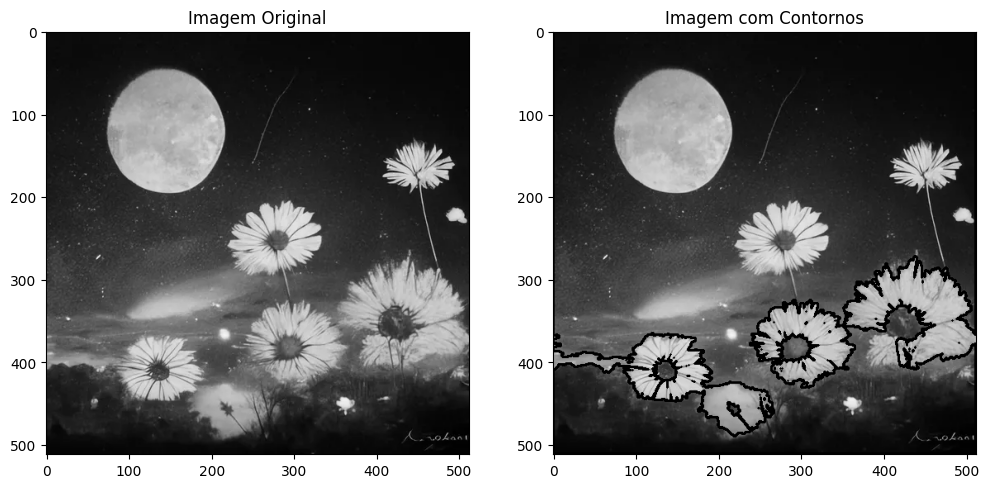

In [131]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Contornos')

plt.show()

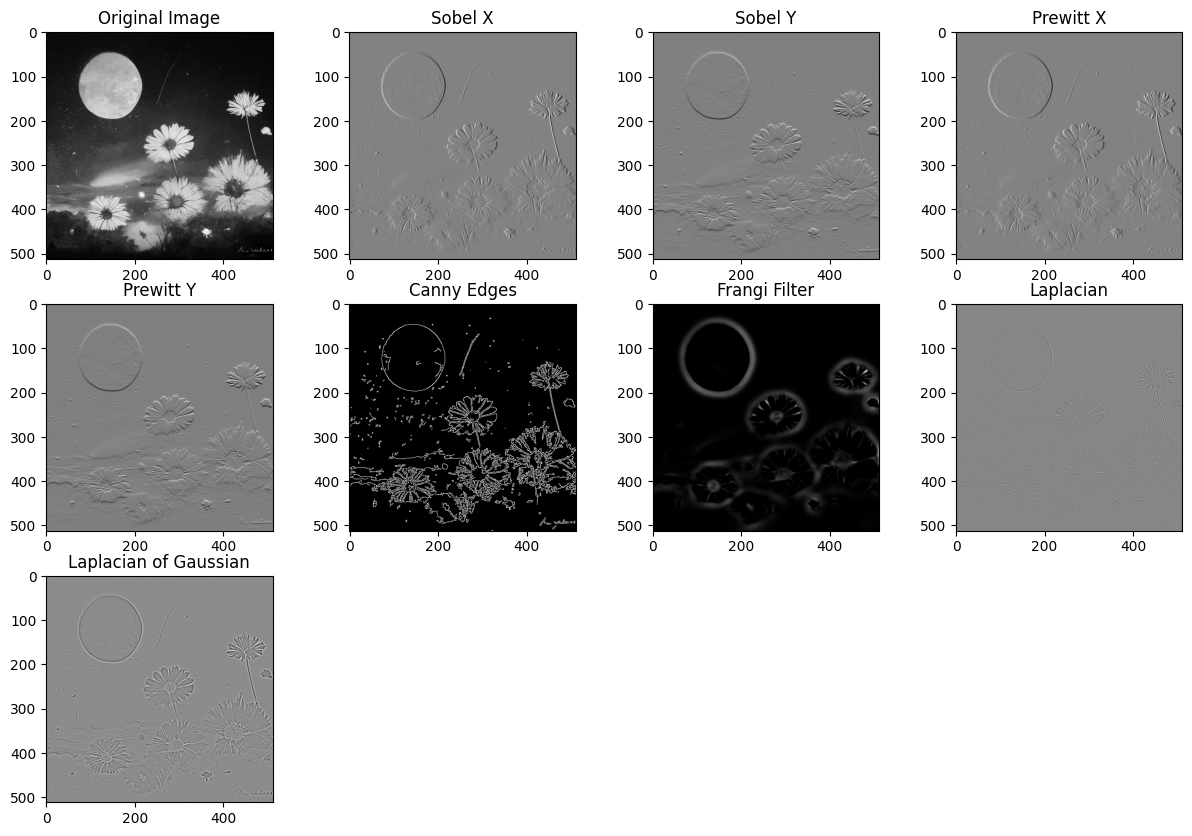

In [132]:
image = cv2.imread(IMAGE_NAME, cv2.IMREAD_GRAYSCALE)

# Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Prewitt filter
prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Canny filter
canny_edges = cv2.Canny(image, 50, 150)

# Frangi filter
frangi_image = filters.frangi(image)

# Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Laplacian of Gaussian (LoG) filter
log_image = cv2.GaussianBlur(image, (5, 5), 0)
log_image = cv2.Laplacian(log_image, cv2.CV_64F)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(3, 4, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(3, 4, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(3, 4, 4), plt.imshow(prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(3, 4, 5), plt.imshow(prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.subplot(3, 4, 6), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(3, 4, 7), plt.imshow(frangi_image, cmap='gray'), plt.title('Frangi Filter')
plt.subplot(3, 4, 8), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(3, 4, 9), plt.imshow(log_image, cmap='gray'), plt.title('Laplacian of Gaussian')

plt.show()